In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('dataframe/champions.csv')  
df.head(5)  

,idPartido,Temporada,Ronda,Local,Visitante,Evento,GolesLocal,GolesVisitante,VictoriaLocal,Empate,...,1_MediaJugadores,%_2_G_Temporada,%_2_G_Temporada_L,%_2_E_Temporada_L,%_2_P_Temporada_L,2_Media_G,2_Media_G_Local,2_Media_Goles_PP,2_ValorJugadores,2_MediaJugadores
0,125,2022-01-01,Group stage,235,11,Stadion Maksimir,1,0,1,0,...,18.743616,55.56,60.00,20.00,20.00,0.56,0.60,1.33,685.188968,26.353422
1,126,2022-01-01,Group stage,14,153,Signal Iduna Park,3,0,1,0,...,19.853461,0.00,0.00,100.00,0.00,0.00,0.00,0.20,356.128703,14.245148
2,127,2022-01-01,Group stage,15,1,Celtic Park,0,3,0,0,...,18.490575,63.64,83.33,16.67,0.00,0.64,0.83,2.09,796.271706,36.194168
3,128,2022-01-01,Group stage,10,298,Estádio do Sport Lisboa e Benfica,2,0,1,0,...,28.153728,20.00,33.33,0.00,66.67,0.20,0.33,1.40,382.737487,19.136874
4,129,2022-01-01,Group stage,184,2,Red Bull Arena,1,1,0,1,...,19.353798,45.45,66.67,0.00,33.33,0.45,0.67,1.27,749.233912,32.575387


In [4]:
# Eliminar la columna 'Temporada' y 'Ronda' ya que son categóricas y no se pueden convertir directamente a flotante
df = df.drop(columns=['Temporada', 'Ronda', 'Evento'])
df.head(5)

,idPartido,Local,Visitante,GolesLocal,GolesVisitante,VictoriaLocal,Empate,VictoriaVisitante,%_Victorias_Local,%_Empate,...,1_MediaJugadores,%_2_G_Temporada,%_2_G_Temporada_L,%_2_E_Temporada_L,%_2_P_Temporada_L,2_Media_G,2_Media_G_Local,2_Media_Goles_PP,2_ValorJugadores,2_MediaJugadores
0,125,235,11,1,0,1,0,0,100.0,0.0,...,18.743616,55.56,60.00,20.00,20.00,0.56,0.60,1.33,685.188968,26.353422
1,126,14,153,3,0,1,0,0,0.0,100.0,...,19.853461,0.00,0.00,100.00,0.00,0.00,0.00,0.20,356.128703,14.245148
2,127,15,1,0,3,0,0,1,100.0,0.0,...,18.490575,63.64,83.33,16.67,0.00,0.64,0.83,2.09,796.271706,36.194168
3,128,10,298,2,0,1,0,0,0.0,0.0,...,28.153728,20.00,33.33,0.00,66.67,0.20,0.33,1.40,382.737487,19.136874
4,129,184,2,1,1,0,1,0,100.0,0.0,...,19.353798,45.45,66.67,0.00,33.33,0.45,0.67,1.27,749.233912,32.575387


In [5]:
df.columns

Index(['idPartido', 'Local', 'Visitante', 'GolesLocal', 'GolesVisitante',
       'VictoriaLocal', 'Empate', 'VictoriaVisitante', '%_Victorias_Local',
       '%_Empate', '%_Victoria_Visitante', '%_Equipo1_Ganado',
       '%_Equipo2_Ganado', '%_1_G_Temporada', '%_1_G_Temporada_L',
       '%_1_E_Temporada_L', '%_1_P_Temporada_L', '1_Media_G',
       '1_Media_G_Local', '1_Media_Goles_PP', '1_ValorJugadores',
       '1_MediaJugadores', '%_2_G_Temporada', '%_2_G_Temporada_L',
       '%_2_E_Temporada_L', '%_2_P_Temporada_L', '2_Media_G',
       '2_Media_G_Local', '2_Media_Goles_PP', '2_ValorJugadores',
       '2_MediaJugadores'],
      dtype='object')

In [6]:
numeric_features = ['GolesLocal', 'GolesVisitante', '%_Victorias_Local', '%_Empate', '%_Victoria_Visitante',
                    '%_Equipo1_Ganado', '%_Equipo2_Ganado', '%_1_G_Temporada', '%_1_G_Temporada_L', '%_1_E_Temporada_L', '%_1_P_Temporada_L',
                    '1_Media_G', '1_Media_G_Local', '1_Media_Goles_PP', '1_ValorJugadores', '1_MediaJugadores',
                    '%_2_G_Temporada', '%_2_G_Temporada_L', '%_2_E_Temporada_L', '%_2_P_Temporada_L',
                    '2_Media_G', '2_Media_G_Local', '2_Media_Goles_PP', '2_ValorJugadores', '2_MediaJugadores']

stats = df[numeric_features].describe()
print(stats)

        GolesLocal  GolesVisitante  %_Victorias_Local     %_Empate  \
count  2494.000000     2494.000000        2494.000000  2494.000000   
mean      1.609463        1.199679          47.197045    22.482931   
std       1.422643        1.237624          39.876423    33.914545   
min       0.000000        0.000000           0.000000     0.000000   
25%       1.000000        0.000000           0.000000     0.000000   
50%       1.000000        1.000000          42.860000     0.000000   
75%       2.000000        2.000000         100.000000    33.330000   
max       8.000000        8.000000         100.000000   100.000000   

       %_Victoria_Visitante  %_Equipo1_Ganado  %_Equipo2_Ganado  \
count           2494.000000       2494.000000       2494.000000   
mean              30.078829         33.336704         43.939218   
std               37.212550         38.987189         41.493038   
min                0.000000          0.000000          0.000000   
25%                0.000000       

En promedio, se marcan más goles en casa (1.61 goles) que fuera (1.20 goles). Sin embargo, la diferencia no es significativa. El porcentaje promedio de victorias en casa es del 47.55%, mientras que el porcentaje promedio de victorias como visitante es del 30.07%. Esto sugiere que los equipos tienen una ligera ventaja al jugar en casa. El porcentaje promedio de empates es del 22.37%. Esto indica que aproximadamente una de cada cinco partidos termina en empate.

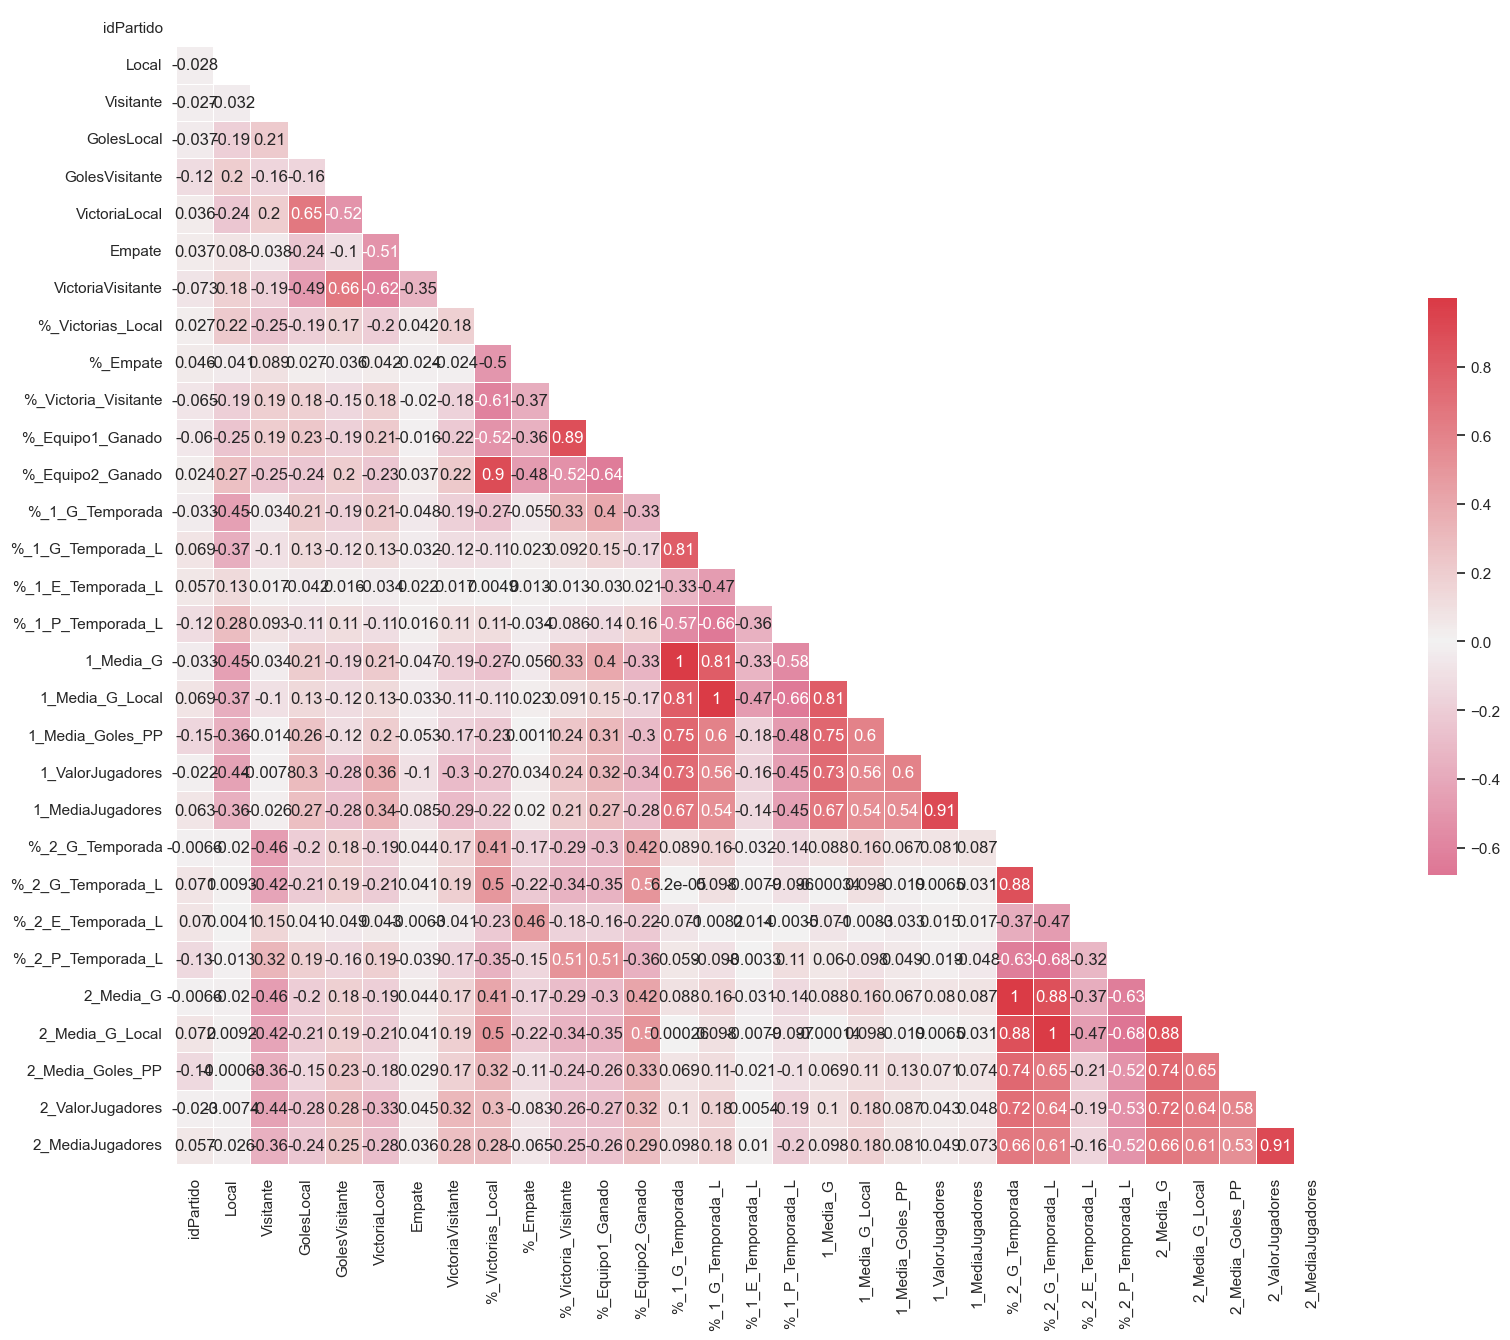

In [7]:
# Seleccionar solo las columnas numéricas
columnas_numericas = df.select_dtypes(include='number')

# Calcular la matriz de correlación
matriz_correlacion = columnas_numericas.corr()

# Crear el mapa de calor
plt.figure(figsize=(25, 15))
sns.set(style='white')

mask = np.triu(np.ones_like(matriz_correlacion, dtype=bool))
cmap = sns.diverging_palette(0, 10, as_cmap=True)

sns.heatmap(matriz_correlacion,
            mask=mask,
            cmap=cmap,
            center=0,
            square=True,
            annot=True,
            linewidths=0.5,
            cbar_kws={'shrink': 0.5})

plt.show()

In [8]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

# Aplicar transformación de potencia a las características
pt = PowerTransformer()
X_transformed = pt.fit_transform(columnas_numericas)

# Convertir el resultado en un DataFrame con los mismos nombres de columnas
X_transformed_df = pd.DataFrame(X_transformed, columns=columnas_numericas.columns)

# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_transformed_df)

# Convertir el resultado en un DataFrame con los mismos nombres de columnas
X_scaled_df = pd.DataFrame(X_scaled, columns=X_transformed_df.columns)

# Visualizar estadísticas de las características transformadas y normalizadas
print(X_scaled_df.describe())

         idPartido         Local     Visitante    GolesLocal  GolesVisitante  \
count  2494.000000  2.494000e+03  2.494000e+03  2.494000e+03    2.494000e+03   
mean      0.000000 -7.122521e-19 -2.136756e-18  5.128215e-17   -1.709405e-17   
std       1.000201  1.000201e+00  1.000201e+00  1.000201e+00    1.000201e+00   
min      -1.984641 -1.935583e+00 -1.939535e+00 -1.441225e+00   -1.221749e+00   
25%      -0.815981 -7.272463e-01 -7.262063e-01 -2.392729e-01   -1.221749e+00   
50%       0.079018  6.744150e-02  6.980573e-02 -2.392729e-01    1.440941e-01   
75%       0.867750  8.749821e-01  8.770949e-01  5.004854e-01    8.657620e-01   
max       1.592249  2.194796e+00  2.193020e+00  2.650455e+00    2.570411e+00   

       VictoriaLocal        Empate  VictoriaVisitante  %_Victorias_Local  \
count   2.494000e+03  2.494000e+03       2.494000e+03       2.494000e+03   
mean    9.401728e-17  1.424504e-17       8.547026e-18       5.840468e-17   
std     1.000201e+00  1.000201e+00       1.000201e+

In [9]:
# Separar características y etiquetas
X = X_scaled_df.drop(columns=['GolesLocal', 'GolesVisitante'])  # Características
y_local = df['GolesLocal']
y_visitante = df['GolesVisitante']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_local_train, y_local_test = train_test_split(X, y_local, test_size=0.30, random_state=0)
_, _, y_visitante_train, y_visitante_test = train_test_split(X, y_visitante, test_size=0.30, random_state=0)


print('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))


Training Set: 1745 rows
Test Set: 749 rows


In [11]:
from sklearn.linear_model import LinearRegression

# Entrenar el modelo para predecir los goles locales
model_local = LinearRegression().fit(X_train, y_local_train)
print("Modelo para goles locales entrenado.")

# Entrenar el modelo para predecir los goles visitantes
model_visitante = LinearRegression().fit(X_train, y_visitante_train)
print("Modelo para goles visitantes entrenado.")

Modelo para goles locales entrenado.
Modelo para goles visitantes entrenado.


In [12]:
def visualize_regression(model, X_test, y_test):
    # Hacer predicciones en el conjunto de prueba
    predictions = model.predict(X_test)

    # Visualizar el gráfico de dispersión de las etiquetas reales vs las predicciones
    plt.scatter(y_test, predictions)
    plt.xlabel('Actual Labels')
    plt.ylabel('Predicted Labels')

    # Añadir una línea de regresión
    z = np.polyfit(y_test, predictions, 1)
    p = np.poly1d(z)
    plt.plot(y_test, p(y_test), color='magenta')
    plt.show()

Visualización del modelo para goles locales:


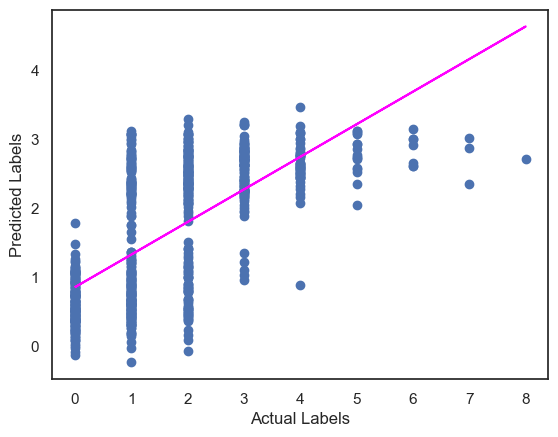

Visualización del modelo para goles visitantes:


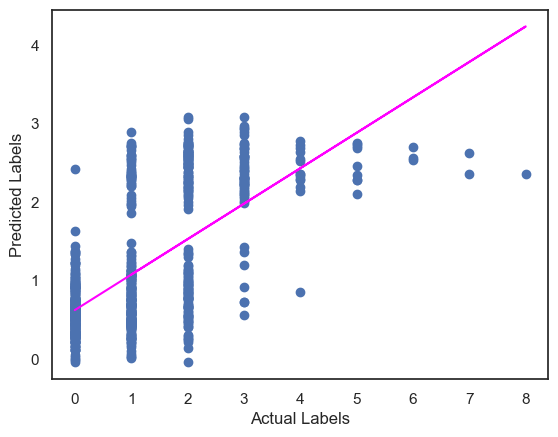

In [13]:
print("Visualización del modelo para goles locales:")
visualize_regression(model_local, X_test, y_local_test)

print("Visualización del modelo para goles visitantes:")
visualize_regression(model_visitante, X_test, y_visitante_test)

In [14]:
#Evaluación del modelo
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_regression_model(model, X_test, y_test):
    # Hacer predicciones en el conjunto de prueba
    predictions = model.predict(X_test)

    # Calcular el error cuadrático medio (MSE)
    mse = mean_squared_error(y_test, predictions)
    print("MSE:", mse)

    # Calcular la raíz del error cuadrático medio (RMSE)
    rmse = np.sqrt(mse)
    print("RMSE:", rmse)

    # Calcular el coeficiente de determinación (R^2)
    r2 = r2_score(y_test, predictions)
    print("R2:", r2)

    return mse, rmse, r2


In [15]:
print("Evaluación del modelo para goles locales:")
evaluate_regression_model(model_local, X_test, y_local_test)

print("Evaluación del modelo para goles visitantes:")
evaluate_regression_model(model_visitante, X_test, y_visitante_test)

Evaluación del modelo para goles locales:
MSE: 1.0854343467482939
RMSE: 1.0418418050492568
R2: 0.4450036785643353
Evaluación del modelo para goles visitantes:
MSE: 0.8701816538006968
RMSE: 0.9328352768847761
R2: 0.4142915340324418


(0.8701816538006968, 0.9328352768847761, 0.4142915340324418)

#### Lasso algorithm

MSE: 2.948615770636577
RMSE: 1.717153391702843
R2: -0.0041645901228974935


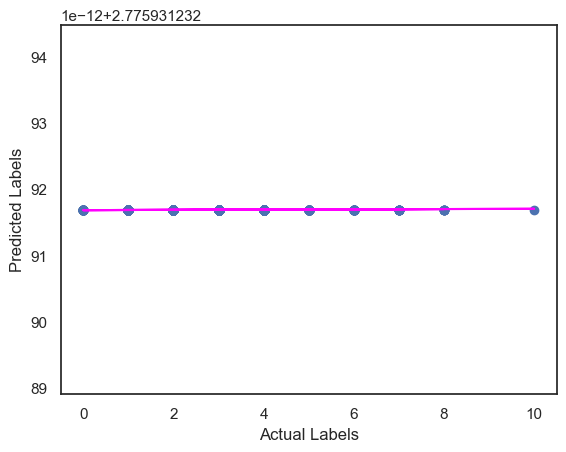

In [15]:
from sklearn.linear_model import Lasso

#Entrenamiento modelo
model = Lasso().fit(X_train, y_train)

#Evaluación
evaluate_regression_model(model, X_test, y_test)

#Visualización
visualize_regresion(model, X_test, y_test)


- El modelo de regresión lineal tiene un MSE y RMSE más bajos, lo que indica que tiene un mejor rendimiento en términos de precisión de la predicción en comparación con el modelo Lasso.

- El modelo Lasso tiene un valor de R2 más bajo en comparación con el modelo de regresión lineal, lo que indica que explica menos la variabilidad de los datos observados. Esto podría deberse a la penalización L1 en Lasso, que puede eliminar características menos importantes, lo que conduce a un modelo más simple pero posiblemente menos explicativo.

#### Árboles de decisión

MSE: 5.313751668891856
RMSE: 2.3051576234374638
R2: -0.8096224403818095
|--- feature_4 <= 0.66
|   |--- feature_0 <= 0.63
|   |   |--- feature_17 <= 0.68
|   |   |   |--- feature_1 <= 1.70
|   |   |   |   |--- feature_19 <= 1.79
|   |   |   |   |   |--- feature_2 <= 1.54
|   |   |   |   |   |   |--- feature_27 <= 1.80
|   |   |   |   |   |   |   |--- feature_7 <= 0.91
|   |   |   |   |   |   |   |   |--- feature_1 <= -1.78
|   |   |   |   |   |   |   |   |   |--- feature_23 <= 0.80
|   |   |   |   |   |   |   |   |   |   |--- feature_22 <= 0.53
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- feature_22 >  0.53
|   |   |   |   |   |   |   |   |   |   |   |--- value: [5.00]
|   |   |   |   |   |   |   |   |   |--- feature_23 >  0.80
|   |   |   |   |   |   |   |   |   |   |--- value: [8.00]
|   |   |   |   |   |   |   |   |--- feature_1 >  -1.78
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 0.52
|   |   |  

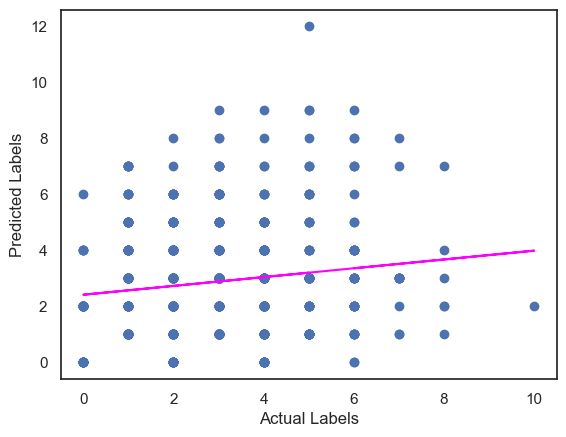

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
model_tree = DecisionTreeRegressor().fit(X_train, y_train)

# Evaluate the model
evaluate_regression_model(model_tree, X_test, y_test)

# Visualize the model tree
tree_text = export_text(model_tree)
print(tree_text)
visualize_regresion(model_tree, X_test, y_test)

 Cada nodo evalúa una característica del conjunto de datos y, dependiendo del valor de esa característica, el árbol sigue una rama específica hasta llegar a un nodo final donde se hace una predicción sobre el número de goles. Ahora voy a evaluar este modelo. El modelo basado en árboles no parece haber mejorado con respecto al modelo lineal, tiene un margen de mejora especialmente en términos de reducir el error y mejorar la capacidad del modelo para explicar la variabilidad en los datos de destino ya que en estos momentos es de un 32%.



### Ensemble Algorithm

En lugar de depender de un solo modelo,  los algoritmos de conjunto utilizan la idea de que la combinación de múltiples modelos puede producir predicciones más precisas y robustas que cualquier modelo individual. Voy a entrenar un modelo de regresión utilizando el algoritmo Random Forest Regressor y Gradient Boosting.

MSE: 2.836248064085447
RMSE: 1.6841164045532742
R2: 0.034102746406882156


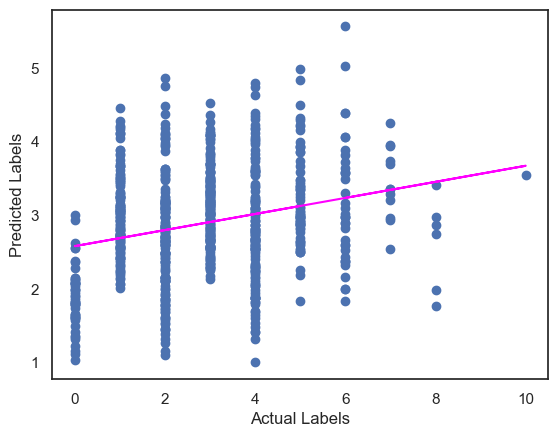

In [17]:
from sklearn.ensemble import RandomForestRegressor

#Train the model
model_random = RandomForestRegressor().fit(X_train, y_train)

#Evaluación
evaluate_regression_model(model_random, X_test, y_test)

#Visualización
visualize_regresion(model_random, X_test, y_test)

MSE: 2.814911309672079
RMSE: 1.6777697427454337
R2: 0.041369075734499994


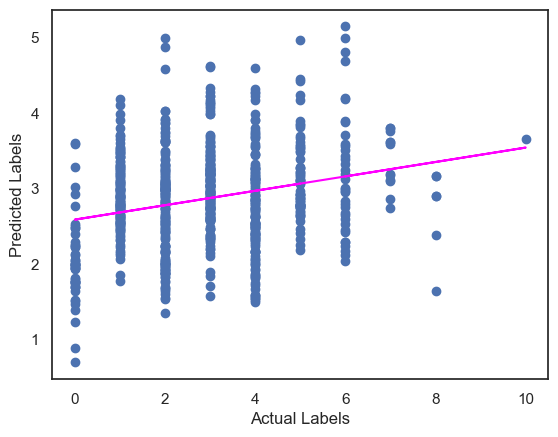

In [18]:
from sklearn.ensemble import GradientBoostingRegressor

# Fit a lasso model on the training set
model_gradient = GradientBoostingRegressor().fit(X_train, y_train)

#Evaluación
evaluate_regression_model(model_gradient, X_test, y_test)

#Visualización
visualize_regresion(model_gradient, X_test, y_test)


· El modelo de ensemble (Gradient Boosting en este caso) muestra el mejor rendimiento en términos de MSE, RMSE y R2 en comparación con los otros modelos.

· El modelo Lasso parece tener el peor rendimiento, lo que indica que no explica tan bien la variabilidad de los datos.

· El árbol de decisión tiene un rendimiento similar al Lasso, aunque ligeramente mejor, pero aún así es superado por la regresión lineal y el ensemble algorithm en términos de métricas de evaluación.

· El ensemble algorithm muestra un rendimiento bastante bueno, con el MSE más bajo y un R2 alto en comparación con los otros modelos, lo que sugiere que puede ser una opción sólida para hacer predicciones precisas.

### Optimización con hiperparámetros para GradientBosoting

A continuación vamos a probar la técnica de ajuste de hiperparámetros buscando la mejor combinación de estos para el estimador GradientBoostingRegressor utilizando la métrica de puntuación R2 a través de la técnica de búsqueda en cuadrícula.

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

#Agregamos el modelo a una variable
alg = GradientBoostingRegressor()

#El diccionario params especifica una cuadrícula de combinaciones de hiperparámetros que se probarán durante la búsqueda en cuadrícula para encontrar la mejor combinación
#learning_rate contribución de cada árbol en el conjunto, n_estimators número de árboles de decisión que se utilizarán en el ensamble
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

#Utilizaremos GridSearchCV para realizar una búsqueda exhaustiva sobre una cuadrícula de valores de hiperparámetros, con el objetivo de encontrar la combinación de hiperparámetros que maximice una métrica de evaluación específica. En este caso, la métrica de evaluación utilizada es el coeficiente de determinación R2.
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Mejor combinacion de parametros:", gridsearch.best_params_)

Mejor combinacion de parametros: {'learning_rate': 0.1, 'n_estimators': 50}


In [20]:
#Mejor modelo encontrado en la búsqueda
model_GB_Hiper=gridsearch.best_estimator_
print(model_GB_Hiper)

GradientBoostingRegressor(n_estimators=50)


In [21]:
#Evaluación del modelo
evaluate_regression_model(model_GB_Hiper, X_test, y_test)

MSE: 2.7748262974598275
RMSE: 1.665780987242869
R2: 0.05502021002572588


(2.7748262974598275, 1.665780987242869, 0.05502021002572588)

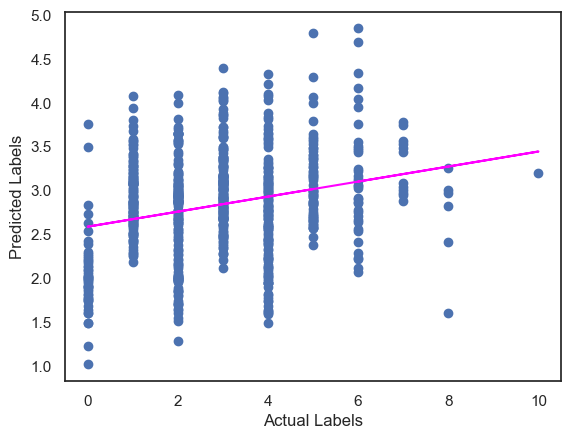

In [22]:
#Gráfica predicha vs actual
visualize_regresion(model_GB_Hiper, X_test, y_test)

En este caso la evaluación no mejora significativamente.

## Preprocesamiento de datos

A continuación, vamos a entrenar un modelo de regresión utilizando un pipeline con los modelos random forest y gradient boosting, ya que son los mejores modelos que nos han salido, en el que se aplican diferentes transformaciones a las características de los datos antes de ajustar el modelo:

- Escalado de características numéricas: Normalizar características numéricas para que estén en la misma escala. Esto evita que las características con valores grandes produzcan coeficientes que afecten desproporcionadamente las predicciones del modelo.

- Codificación de variables categóricas: Convertir características categóricas en representaciones numéricas. Esto se realiza porque la mayoría de los modelos de aprendizaje automático funcionan mejor con características numéricas en lugar de valores de texto.

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression

# Seleccionar las características numéricas a escalar
numeric_features = ['%_Victorias_Local', '%_Empate', '%_Victoria_Visitante', '%_Equipo1_Ganado',
                    '%_Equipo2_Ganado', '%_1_G_Temporada', '%_1_G_Temporada_L', '%_1_E_Temporada_L', 
                    '%_1_P_Temporada_L', '1_Media_G', '1_Media_G_Local', '1_Media_Goles_PP', 
                    '1_ValorJugadores', '1_MediaJugadores', '%_2_G_Temporada', '%_2_G_Temporada_L', 
                    '%_2_E_Temporada_L', '%_2_P_Temporada_L', '2_Media_G', '2_Media_G_Local', 
                    '2_Media_Goles_PP', '2_ValorJugadores', '2_MediaJugadores']

#Definir el preprocesador como un Pipeline
preprocessor = Pipeline(steps=[
    ('scaler', StandardScaler())
])


Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', StandardScaler())])),
                ('regressor', GradientBoostingRegressor())]) 

MSE: 2.8111515524349304
RMSE: 1.6766489055359595
R2: 0.04264947826188248


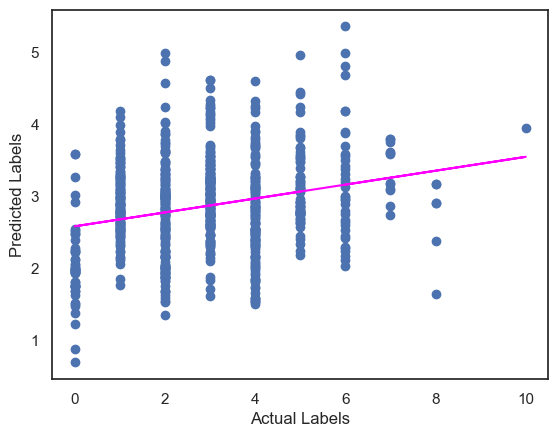

In [24]:
# Crear un Pipeline completo con el preprocesador y el modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor())
])


# Entrenar el Pipeline
model_pipe_GB = pipeline.fit(X_train, y_train)
print(model_pipe_GB, "\n")

#Evaluación
evaluate_regression_model(model_pipe_GB, X_test, y_test)

#Gráfico predicho vs actual
visualize_regresion(model_pipe_GB, X_test, y_test)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', StandardScaler())])),
                ('regressor', RandomForestRegressor())]) 

MSE: 2.787411481975968
RMSE: 1.6695542764390645
R2: 0.050734267863603244


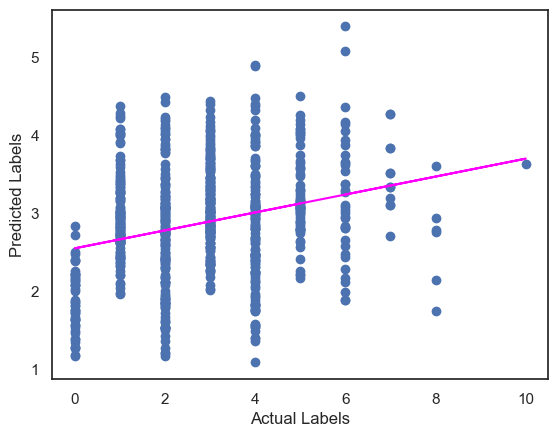

In [25]:
# Use a different estimator in the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])


# fit the pipeline to train a linear regression model on the training set
model_pipe_RF = pipeline.fit(X_train, (y_train))
print(model_pipe_RF, "\n")


# Display metrics
evaluate_regression_model(model_pipe_RF, X_test, y_test)

# Plot predicted vs actual
visualize_regresion(model_pipe_RF, X_test, y_test)


En mi caso normalizar los datos no afecta a mi modelo boost gradient, pero si mejora el modelo de random forest. Evaluando todos los modelos podemos ver que los mejores valores valores lo tiene el modelo gradient boosting ajustado con hiperparametros, en concreto con 50 estimadores. 

Voy a hacer una última prueba normalizando los datos mediante el logaritmo para ver si mejoraría los modelos, ya que algunos valores estén sesgados o tengan valores atípicos.

La estandarización de las características mediante el pipeline que hemos hecho anteriormente implica transformarlas de modo que tengan una media de cero y una desviación estándar de uno. Esto se logra restando la media de cada característica y dividiendo por su desviación estándar. Por otro lado, la transformación logarítmica, como np.log1p, se utiliza para modificar la distribución de las características, especialmente si están sesgadas o si varían en órdenes de magnitud. 

In [26]:
from sklearn.preprocessing import PowerTransformer

#Normalizamos los datos de entrenamiento y los guardamos en un fichero para su uso futuro
pt = PowerTransformer()
pt.fit(X_train)
#with open('/Users/carlotasanchezgonzalez/Desktop/regresion1 copia/scalers/octavos_scaler.pkl', 'wb') as f:
    #pickle.dump(pt, f)

#Normalizamos los datos para que se asemeje a una distribución normal y así mejorar el rendimiento del modelo
x_train_scaled = pt.transform(X_train)
x_test_scaled = pt.transform(X_test)

y_train_scaled = np.log1p(y_train)

#Y lo guardamos en dataframes
x_train_scaled = pd.DataFrame(x_train_scaled, columns=X.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=X.columns)

x_train_scaled


,idPartido,Local,Visitante,VictoriaLocal,Empate,VictoriaVisitante,%_Victorias_Local,%_Empate,%_Victoria_Visitante,%_Equipo1_Ganado,...,1_MediaJugadores,%_2_G_Temporada,%_2_G_Temporada_L,%_2_E_Temporada_L,%_2_P_Temporada_L,2_Media_G,2_Media_G_Local,2_Media_Goles_PP,2_ValorJugadores,2_MediaJugadores
0,1.337090,-0.141159,0.434751,-0.919026,-0.548879,1.489818,-0.174872,1.141506,0.801459,-1.030528,...,0.272495,1.215355,1.178676,0.180685,-1.377473,1.231122,1.185391,0.891815,0.763566,0.498227
1,0.056532,0.490576,1.813515,-0.919026,1.821897,-0.671223,-1.300392,-0.848633,1.279531,1.227679,...,0.776108,0.872044,-0.528240,-1.234075,1.273689,0.872794,-0.564074,0.326919,-1.084947,-0.563518
2,-1.019840,0.717014,0.073956,-0.919026,-0.548879,1.489818,0.721605,1.087087,-1.007759,0.567168,...,0.736956,1.390483,1.178676,-1.234075,-0.136496,1.388223,1.185391,1.158598,1.139098,0.969552
3,-1.618364,0.186283,-1.637988,-0.919026,1.821897,-0.671223,-0.174872,1.141506,0.801459,0.702729,...,-0.464710,0.165238,0.646054,-1.234075,0.336503,0.147123,0.666862,-0.035215,1.228348,1.223556
4,1.259376,-0.598375,1.960991,1.088108,-0.548879,-0.671223,1.197712,-0.848633,-1.007759,-1.030528,...,0.150235,-0.080403,-0.528240,-1.234075,1.273689,-0.080436,-0.564074,-1.339746,-0.706917,-0.649181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1740,-0.276451,1.800588,0.942594,-0.919026,-0.548879,1.489818,1.197712,-0.848633,-1.007759,-1.030528,...,-0.788383,-1.108404,-0.786121,1.181153,0.051107,-1.154789,-0.827228,-0.385201,-0.023625,0.310613
1741,0.671827,-1.430691,-0.805606,1.088108,-0.548879,-0.671223,0.416507,1.040757,0.574249,0.982667,...,1.514855,1.808261,0.390440,0.180685,-0.136496,1.817053,0.397762,1.184759,0.804522,0.073576
1742,-0.640856,0.040338,0.276076,-0.919026,1.821897,-0.671223,0.554240,-0.848633,0.801459,1.033130,...,1.198473,-0.554793,-0.786121,1.181153,0.051107,-0.554964,-0.827228,-0.144564,0.156541,-0.642118
1743,-0.543059,0.429331,0.839984,-0.919026,1.821897,-0.671223,1.197712,-0.848633,-1.007759,-1.030528,...,-0.931532,0.728190,0.975831,-1.234075,0.051107,0.722895,0.983195,-0.144564,0.013599,-0.048515


GradientBoostingRegressor() 

MSE: 2.804599484703724
RMSE: 1.6746938480521518
R2: 0.04488081490237794


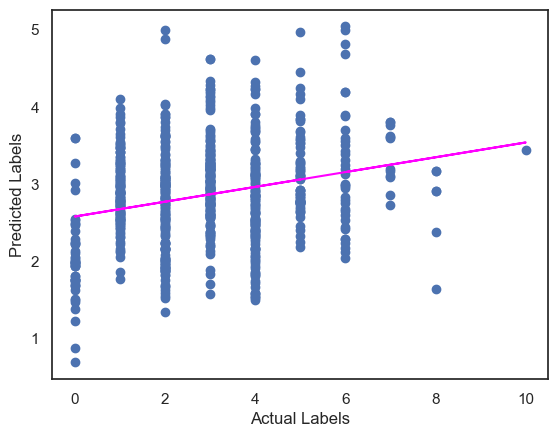

In [27]:
#Entrenamos el modelo con los datos normalizados
model_log_GB = GradientBoostingRegressor().fit(X_train, y_train)
print(model_log_GB, "\n")

#Evaluación del modelo
evaluate_regression_model(model_log_GB, X_test, y_test)

#Gráfica predicha vs actual
visualize_regresion(model_log_GB, X_test, y_test)

RandomForestRegressor() 

MSE: 2.8145439252336444
RMSE: 1.6776602532198361
R2: 0.041494190185732194


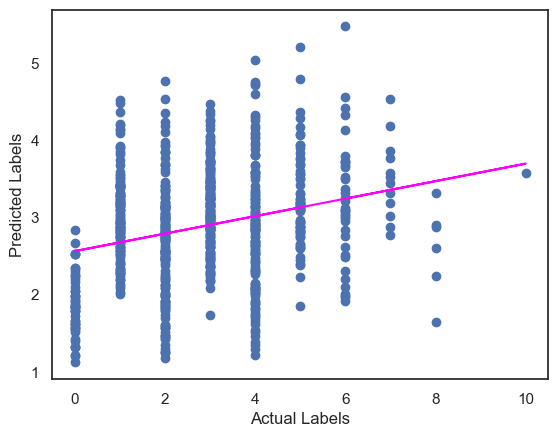

In [28]:
#Entrenamos el modelo con los datos normalizados
model_log_RF = RandomForestRegressor().fit(X_train, y_train)
print(model_log_RF, "\n")

#Evaluación del modelo
evaluate_regression_model(model_log_RF, X_test, y_test)

#Gráfica predicha vs actual
visualize_regresion(model_log_RF, X_test, y_test)

Estandarizando mediante algoritmo podemos ver que para el algoritmo de random forest no afecta notablemente en comparacion con pipeline. Pero para gradient boosting los errores si nos mejoran un poco, por tanto vamos a guardar este modelo y será el que utilizaremos para predecir neustros valores.